In [38]:
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from os import getcwd


In [4]:
df = pd.read_csv('D:\iis\IISLR1\data\car_data.csv')

In [5]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df['Car_Name'] = df['Car_Name'].astype('category')
df['Year'] = df['Year'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner'] = df['Owner'].astype('int8')

df['Selling_Price'] = df['Selling_Price'].astype('float32')
df['Present_Price'] = df['Present_Price'].astype('float32')
df['Driven_kms'] = df['Driven_kms'].astype('int32')

In [8]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628471,36947.205980,0.043189
std,5.082811,8.642585,38886.883882,0.247915
min,0.100000,0.320000,500.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000
50%,3.600000,6.400000,32000.000000,0.000000
75%,6.000000,9.900000,48767.000000,0.000000
max,35.000000,92.599998,500000.000000,3.000000


In [9]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Year', 'Fuel_Type', 'Selling_type', 'Transmission']

In [10]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [11]:
df.info(show_counts=True)
#Уменьшен размер до 9.3 кб

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    category
 2   Selling_Price  301 non-null    float32 
 3   Present_Price  301 non-null    float32 
 4   Driven_kms     301 non-null    int32   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int8    
dtypes: category(5), float32(2), int32(1), int8(1)
memory usage: 9.3 KB


In [12]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Car_Name - numer of unique = 98
Year - numer of unique = 16
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 2
Transmission - numer of unique = 2


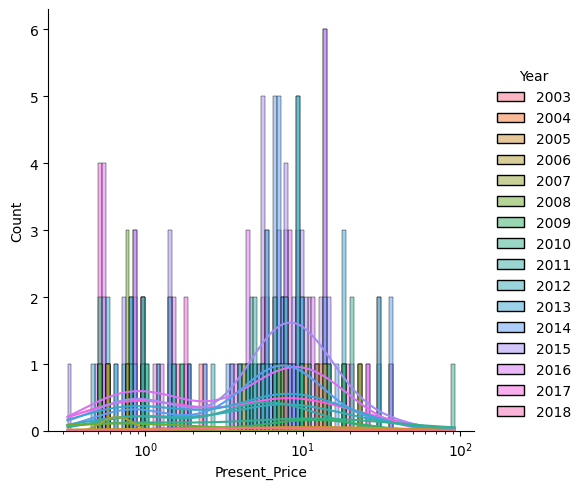

In [13]:
sns.displot(df, x='Present_Price', bins=100, hue='Year', kde=True, log_scale=True)

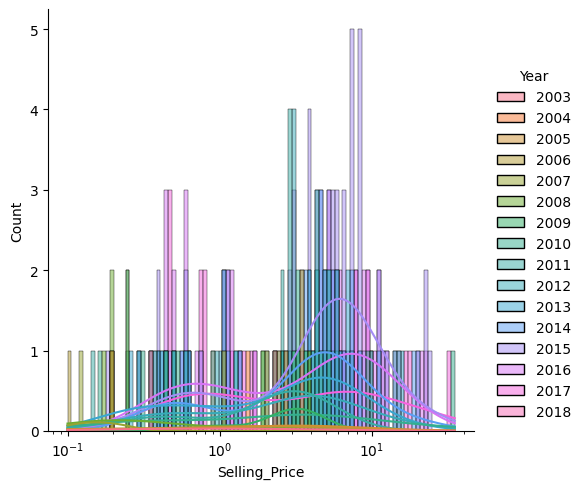

In [14]:
sns.displot(df, x='Selling_Price', bins=100, hue='Year', kde=True, log_scale=True)

<Axes: >

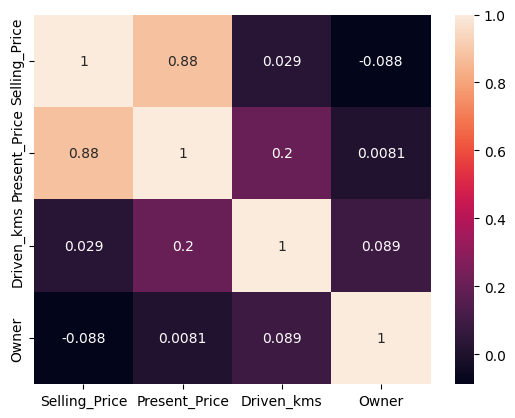

In [15]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

<Axes: xlabel='Year', ylabel='Present_Price'>

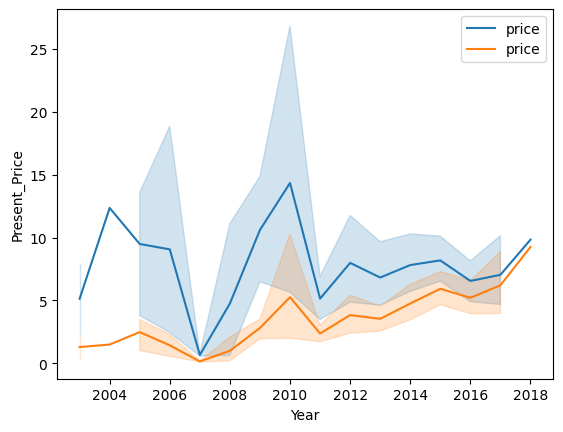

In [16]:
sns.lineplot(df,x='Year',y='Present_Price', label='price')
sns.lineplot(df,x='Year',y='Selling_Price', label='price')

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

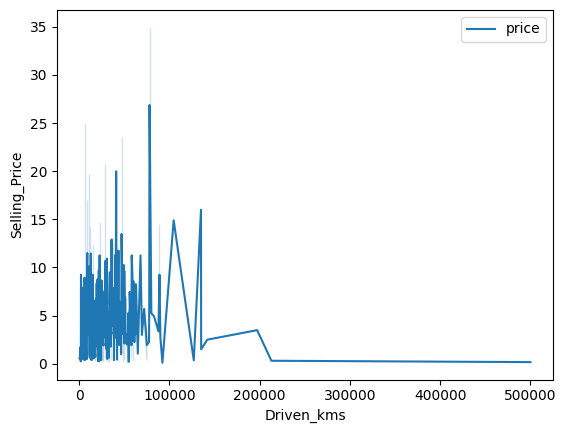

In [17]:
sns.lineplot(df,x='Driven_kms',y='Selling_Price', label='price')

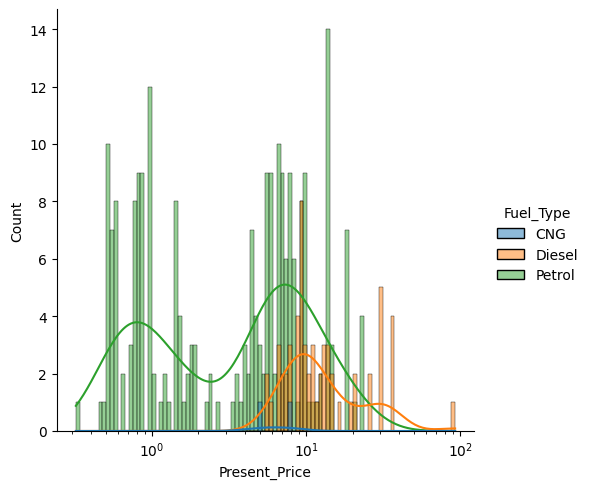

In [18]:
sns.displot(df, x='Present_Price', bins=100, hue='Fuel_Type', kde=True, log_scale=True)

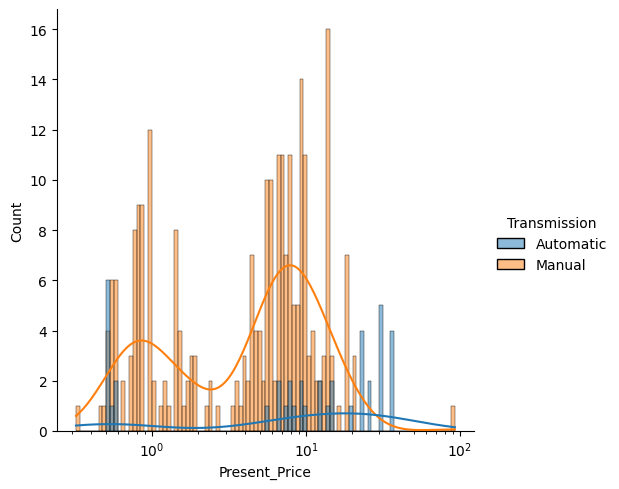

In [19]:
sns.displot(df, x='Present_Price', bins=100, hue='Transmission', kde=True, log_scale=True)

In [20]:
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' +  df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats


In [21]:
aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

C:\Users\sench\AppData\Local\Temp\ipykernel_15920\1870850199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])


,Year,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std,Owner_mean,Owner_std
0,2003,1.300000,1.343503,5.130000,4.030509,94500.000000,45961.940777,0.000000,0.000000
1,2004,1.500000,NaN,12.350000,NaN,135154.000000,NaN,0.000000,NaN
2,2005,2.487500,1.565469,9.485000,6.152769,104294.000000,63559.476692,0.000000,0.000000
3,2006,1.437500,1.081184,9.057500,10.173572,87422.250000,40295.305950,0.750000,1.500000
4,2007,0.160000,0.056569,0.665000,0.120208,51000.000000,2828.427125,0.500000,0.707107
5,2008,1.002857,1.471753,4.759572,8.304893,112128.571429,173231.489769,0.142857,0.377964
6,2009,2.816667,1.085664,10.601666,5.902682,67820.500000,16201.723411,0.000000,0.000000
7,2010,5.262666,8.767003,14.330667,23.112537,60014.066667,45429.155164,0.066667,0.258199
8,2011,2.375263,1.476977,5.148052,3.927316,40327.368421,23467.977897,0.052632,0.229416
9,2012,3.841304,3.942993,7.984782,8.517425,43798.217391,25502.573966,0.043478,0.208514


<Axes: xlabel='Year', ylabel='Selling_Price_mean'>

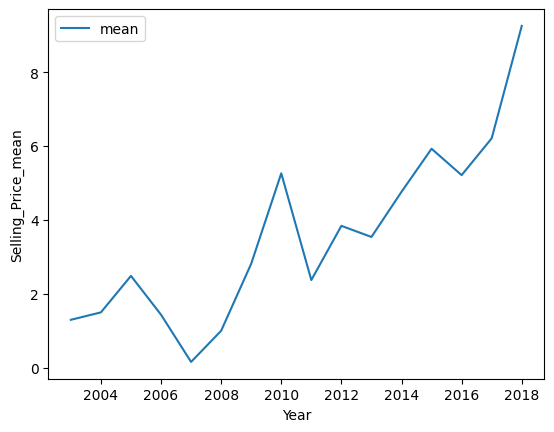

In [22]:
sns.lineplot(aggregated_df,x='Year',y='Selling_Price_mean', label='mean')

C:\Users\sench\AppData\Local\Temp\ipykernel_15920\2501246986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df1 = df[num_features+['Selling_type']].groupby(by='Selling_type').agg(['mean', 'std'])


<Axes: xlabel='Selling_type', ylabel='Selling_Price_mean'>

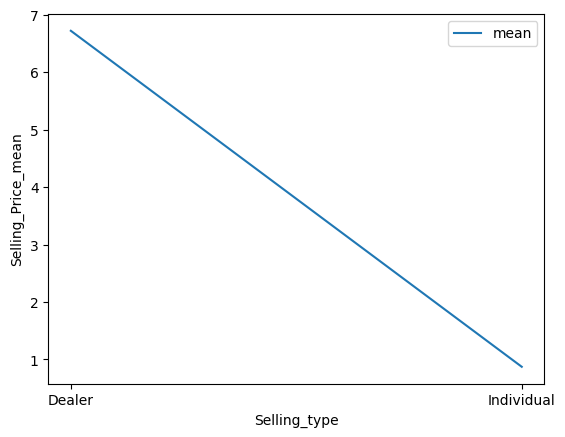

In [23]:
aggregated_df1 = df[num_features+['Selling_type']].groupby(by='Selling_type').agg(['mean', 'std'])
aggregated_df1 = flat_index(aggregated_df1)
aggregated_df1 
sns.lineplot(aggregated_df1,x='Selling_type',y='Selling_Price_mean', label='mean')

In [24]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [32]:
source = ColumnDataSource(data=df.sample(frac=1))
p = figure(width=1000)
p.scatter(source=source, x='Year', y='Selling_Price' )
hover = HoverTool(tooltips=[('Year ', '@Year'),
                              ('Selling_Price', '@Selling_Price'),
                              ('Driven_kms', '@Driven_kms')])

p.add_tools(hover)
show(p)

In [48]:
# Сохраняем обработанный датафрейм, чтобы на следующих этапах не проводить повторно ту же обработку.
# Лучше сохранить в pickle формате, чтобы сохранились все типы данных, в т.ч. category
df.to_pickle('D:/iis/IISLR1/data/clean_data.pkl')

In [49]:
# Считать можно так:
df = pd.read_pickle('D:/iis/IISLR1/data/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    category
 2   Selling_Price  301 non-null    float32 
 3   Present_Price  301 non-null    float32 
 4   Driven_kms     301 non-null    int32   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int8    
dtypes: category(5), float32(2), int32(1), int8(1)
memory usage: 6.4 KB
